In [4]:
from encodings.punycode import adapt

# Import packages
import scanpy as sc

# Load the kidney data
kidney = sc.read_h5ad("/Volumes/CHAMPANERI/Databases/KidneyData.h5ad")

all_genes = {
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QBP': 'ENSG00000108561',
    'C1QC': 'ENSG00000159189',
    # 'C1R': 'ENSG00000159403',
    'C1S': 'ENSG00000182326',
    # 'C2': 'ENSG00000166278',
    'C3': 'ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    # 'C4A': 'ENSG00000244731',
    # 'C4B': 'ENSG00000224389',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6': 'ENSG00000039537',
    'C7': 'ENSG00000112936',
    'C9': 'ENSG00000113600',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    # 'CFB': 'ENSG00000243649',
    # 'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFI': 'ENSG00000205403',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    'FCN1': 'ENSG00000085265',
    'FCN2': 'ENSG00000160339',
    'FCN3': 'ENSG00000142748',
    'VCP': 'ENSG00000165280'
}

subset_genes = {
    "C3": "ENSG00000125730",
    "C3AR1": "ENSG00000171860",
    "C5": "ENSG00000106804",
    "C5AR1": "ENSG00000197405",
    "C5AR2": "ENSG00000134830",
    "CFH": "ENSG00000000971",
}

In [ ]:
# Define the dendrogram location in anndata -- TTR = 6m 32s
# sc.pp.recipe_zheng17(kidney)

sc.pp.filter_genes(kidney, min_counts=1)
sc.pp.normalize_total(kidney, target_sum=1e6)
sc.pp.log1p(kidney)
sc.pp.scale(kidney)

sc.pp.pca(kidney)
sc.pl.pca_overview(kidney)
# sc.tl.dendrogram(kidney, groupby='cell_type')

categories: B cell, T cell, classical monocyte, etc.
var_group_labels: C1D, C1QA, C1QB, etc.


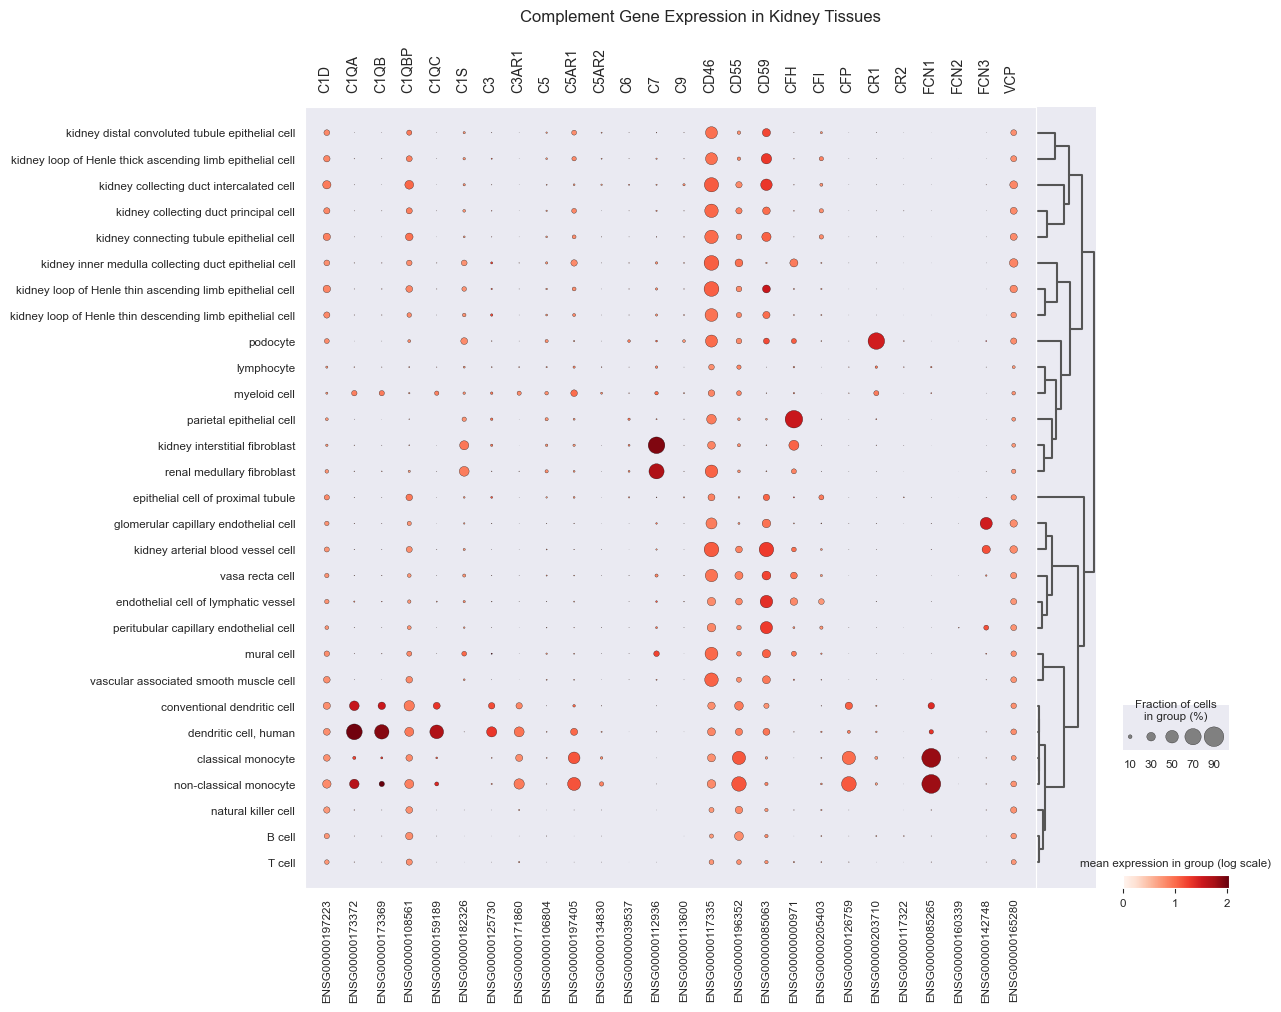

In [16]:
sc.pl.dotplot(
    kidney,
    all_genes,
    groupby='cell_type',
    title='Complement Gene Expression in Kidney Tissues',
    dendrogram=True,
    mean_only_expressed=True,
    log=True,
    colorbar_title='mean expression in group (log scale)',
    # save='human-h5ad_all-gene_tissue_dp.pdf'
)

In [14]:
sc.pl.heatmap(
    kidney,
    subset_genes,
    groupby='tissue',
    swap_axes=False,
    log=False,
    figsize=(3,22),
    dendrogram=True,
    use_raw=False
)

KeyError: "Could not find keys ['ENSG00000000971', 'ENSG00000106804', 'ENSG00000125730', 'ENSG00000134830', 'ENSG00000171860', 'ENSG00000197405'] in columns of `adata.obs` or in adata.var_names."

In [5]:
kidney.var_names

Index(['ENSG00000121410', 'ENSG00000268895', 'ENSG00000148584',
       'ENSG00000175899', 'ENSG00000245105', 'ENSG00000166535',
       'ENSG00000256661', 'ENSG00000256904', 'ENSG00000256069',
       'ENSG00000184389',
       ...
       'ENSG00000198205', 'ENSG00000198455', 'ENSG00000070476',
       'ENSG00000203995', 'ENSG00000162378', 'ENSG00000074755',
       'ENSG00000036549', 'ENSG00000270533', 'ENSG00000272920',
       'ENSG00000266919'],
      dtype='object', name='gene_id', length=33418)